<a href="https://colab.research.google.com/github/suhani121/Forest_fire/blob/main/1/Model/NormalCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split




In [ ]:
data_dir = '/content/drive/MyDrive/forest fire'
labels = {'fire': 0, 'non fire': 1}  # Map categories to numeric labels

# Initialize lists to store image data and labels
image_data = []
image_labels = []

In [ ]:
for category in labels.keys():
    folder_path = os.path.join(data_dir, category)  # Path to category folder
    label = labels[category]  # Numeric label for the category

    for img_name in os.listdir(folder_path):  # Loop through images in the folder
        img_path = os.path.join(folder_path, img_name)
        try:
            # Skip non-image files (e.g., .DS_Store)
            if img_name.endswith('.jpg') or img_name.endswith('.png'):
                # Load and preprocess the image
                img = Image.open(img_path).convert('RGB')  # Ensure 3 channels
                img = img.resize((128, 128))  # Resize all images to 128x128
                image_data.append(np.array(img))  # Add image data
                image_labels.append(label)  # Add corresponding label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Convert to NumPy arrays
X = np.array(image_data, dtype='float32') / 255.0  # Normalize image data to [0, 1]
y = np.array(image_labels)  # Convert labels to a NumPy array

# Verify shapes
print(f"X shape: {X.shape}")  # Should be (num_images, 128, 128, 3)
print(f"y shape: {y.shape}")  # Should be (num_images,)

X shape: (3085, 128, 128, 3)
y shape: (3085,)


In [ ]:

print(y)



[0 0 0 ... 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [ ]:
# Then split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print (y_train)


X_train shape: (2468, 128, 128, 3)
X_test shape: (617, 128, 128, 3)
y_train shape: (2468,)
y_test shape: (617,)
[1 1 0 ... 0 0 0]


In [ ]:
np.save('/content/drive/MyDrive/forest fire/X_train.npy', X_train)
np.save('/content/drive/MyDrive/forest fire/y_train.npy', y_train)
np.save('/content/drive/MyDrive/forest fire/X_test.npy', X_test)
np.save('/content/drive/MyDrive/forest fire/y_test.npy', y_test)


In [ ]:
# Save files to the local Colab folder
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [ ]:
from google.colab import drive
import shutil

# Save to Google Drive
drive.mount('/content/drive')
shutil.move('X_train.npy', '/content/drive/MyDrive/X_train.npy')
shutil.move('y_train.npy', '/content/drive/MyDrive/y_train.npy')
shutil.move('X_test.npy', '/content/drive/MyDrive/X_test.npy')
shutil.move('y_test.npy', '/content/drive/MyDrive/y_test.npy')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/y_test.npy'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Only using if accuracy not good
'''from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)'''

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5857 - loss: 0.6369 - val_accuracy: 0.8185 - val_loss: 0.3824
Epoch 2/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 77s 976ms/step - accuracy: 0.8073 - loss: 0.3769 - val_accuracy: 0.9190 - val_loss: 0.2163
Epoch 3/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 978ms/step - accuracy: 0.9000 - loss: 0.2606 - val_accuracy: 0.9417 - val_loss: 0.1624
Epoch 4/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 980ms/step - accuracy: 0.9328 - loss: 0.1977 - val_accuracy: 0.9319 - val_loss: 0.1735
Epoch 5/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 80s 947ms/step - accuracy: 0.9320 - loss: 0.1846 - val_accuracy: 0.9514 - val_loss: 0.1397
Epoch 6/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 81s 941ms/step - accuracy: 0.9518 - loss: 0.1461 - val_accuracy: 0.9514 - val_loss: 0.1469
Epoch 7/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 83s 957ms/step - accuracy: 0.9605 - loss: 0.1099 - val_accuracy: 0.9498 - val_loss: 0.1372
Epoch 8/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 957ms/step - accuracy: 0.9607 - loss: 0.1188 - val_accurac

In [ ]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open('/content/drive/MyDrive/testing/download (1).jpg').convert('RGB')

img = img.resize((128, 128))
img.show()
img_array = np.array(img) / 255.0  # Normalize if needed
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


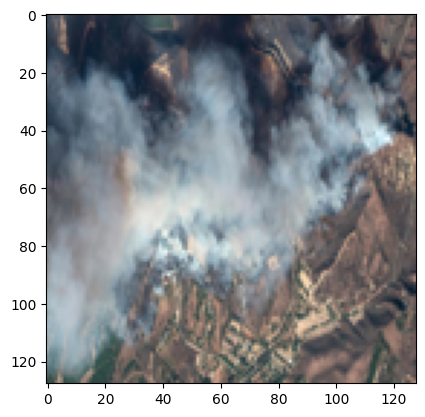

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)


In [ ]:
# Make a prediction
prediction = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:

class_labels = ['Fire', 'No fire']
predicted_class = class_labels[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")


Predicted Class: Fire
